# **Household Power Consumption**

https://www.kaggle.com/datasets/uciml/electric-power-consumption-data-set

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import time

In [47]:
start = time.time()
df = pd.read_csv('household_PC_dataset.txt', sep=';', header=0, low_memory=False)
initial_memory = df.memory_usage(deep=True).sum()

df['datetime'] = pd.to_datetime(df["Date"] + " " + df["Time"], dayfirst=True)
df.drop(columns=["Date", "Time"], inplace=True)

df = df[['datetime'] + [col for col in df.columns if col not in ['datetime']]]
for col in df.select_dtypes(include=['object', 'float64']).columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')
    df[col] = df[col].astype(np.float32)

cleaned_memory = df.memory_usage(deep=True).sum()
print("Initial memory usage: {:.2f} MB".format(initial_memory / 1024**2))
print("Cleaned memory usage: {:.2f} MB".format(cleaned_memory / 1024**2))
print("Memory reduction: {:.2f}%".format((initial_memory - cleaned_memory) / initial_memory * 100))

minutos, segundos = divmod(time.time()-start, 60)
print(f"*******Tiempo dataset: {int(minutos)} minutos y {segundos:.2f} segundos*******")

df.head()

Initial memory usage: 888.21 MB
Cleaned memory usage: 71.25 MB
Memory reduction: 91.98%
*******Tiempo dataset: 0 minutos y 7.92 segundos*******


,datetime,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,2006-12-16 17:24:00,4.216,0.418,234.839996,18.4,0.0,1.0,17.0
1,2006-12-16 17:25:00,5.360,0.436,233.630005,23.0,0.0,1.0,16.0
2,2006-12-16 17:26:00,5.374,0.498,233.289993,23.0,0.0,2.0,17.0
3,2006-12-16 17:27:00,5.388,0.502,233.740005,23.0,0.0,1.0,17.0
4,2006-12-16 17:28:00,3.666,0.528,235.679993,15.8,0.0,1.0,17.0


## **Hours view**

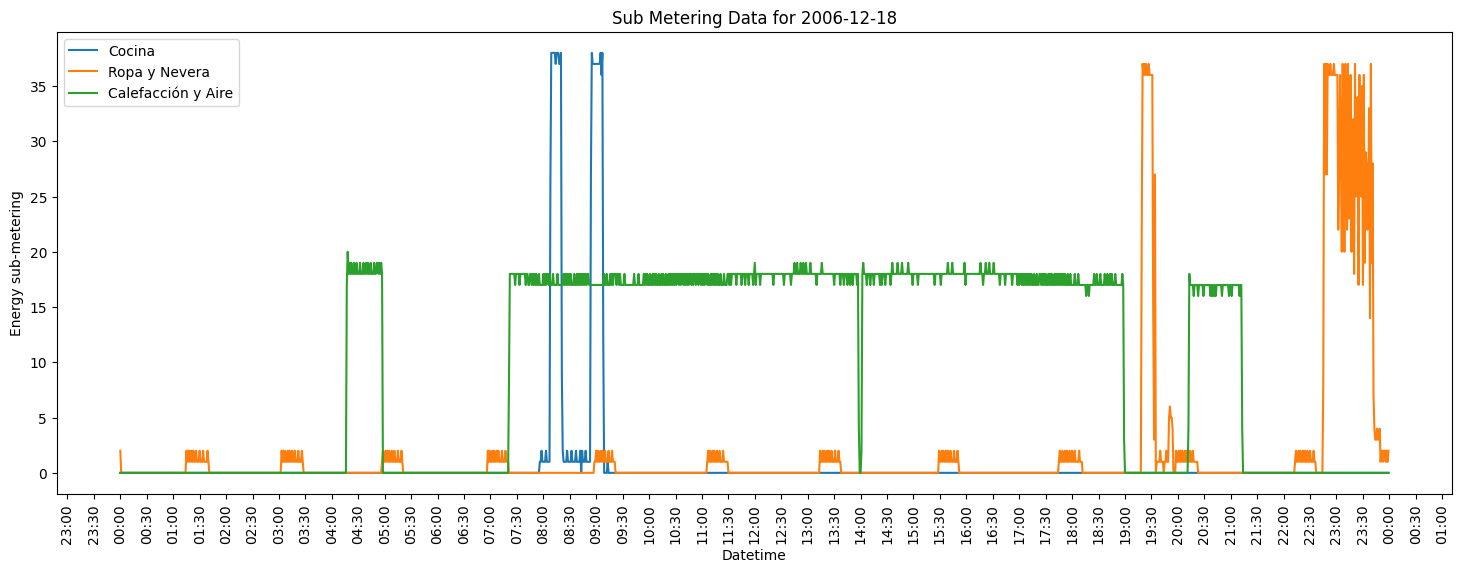

In [54]:
columns_to_plot = df[['Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']]
labels = ["Cocina", "Ropa y Nevera", "Calefacción y Aire"]
start_date = '2006-12-18'

day_data = df[(df['datetime'] >= start_date) & 
              (df['datetime'] < pd.to_datetime(start_date) + pd.Timedelta(days=1))]

plt.figure(figsize=(18, 6))
for i, col in enumerate(columns_to_plot):
    plt.plot(day_data['datetime'], day_data[col], label=labels[i])
plt.title("Sub Metering Data for " + start_date)
plt.xlabel("Datetime")
plt.ylabel("Energy sub-metering")
# Set ticks every 30 minutes
plt.gca().xaxis.set_major_locator(plt.matplotlib.dates.MinuteLocator(byminute=range(0, 60, 30)))
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%H:%M'))
plt.xticks(rotation=90)
plt.legend()
plt.show()

## **Days view**

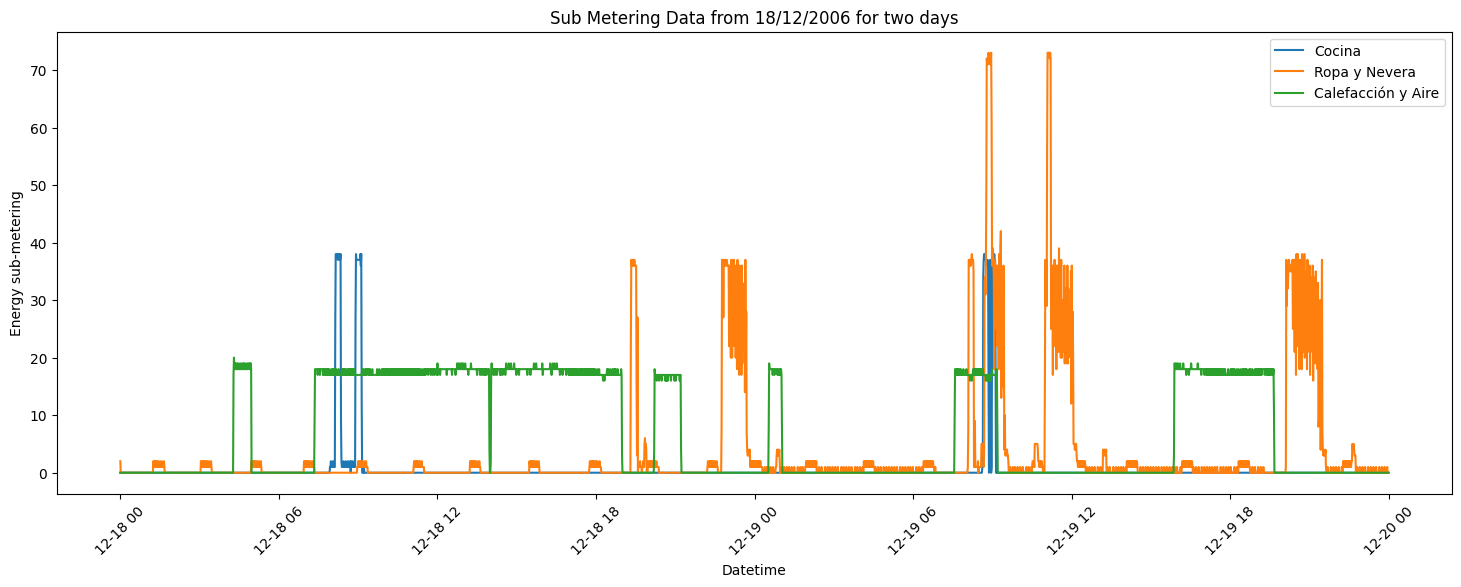

In [49]:
columns_to_plot = df[['Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']]
labels = ["Cocina", "Ropa y Nevera", "Calefacción y Aire"]

# Filter data for one week starting from 18/12/2006
start_date = '2006-12-18'
end_date = '2006-12-20'
week_data = df[(df['datetime'] >= start_date) & (df['datetime'] < end_date)]

plt.figure(figsize=(18, 6))
for i, col in enumerate(columns_to_plot):
    plt.plot(week_data['datetime'], week_data[col], label=labels[i])
plt.title('Sub Metering Data from 18/12/2006 for two days')
plt.xlabel('Datetime')
plt.ylabel('Energy sub-metering')
plt.xticks(rotation=45)
plt.legend()
plt.show()

## **Week view**

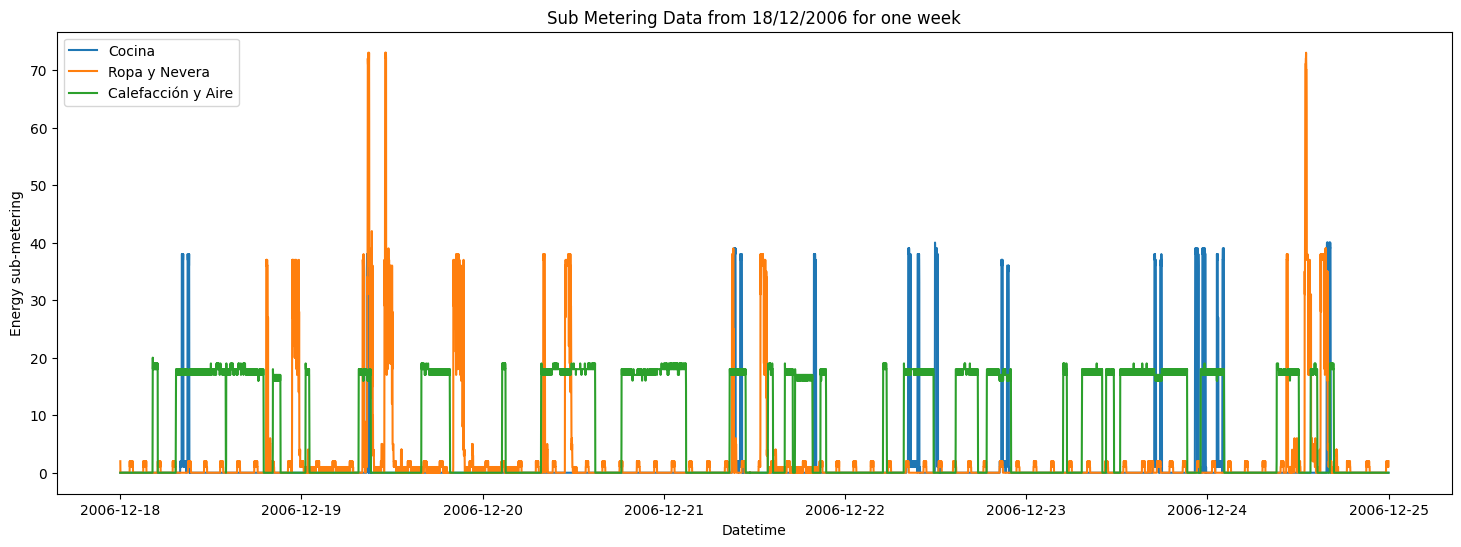

In [51]:
columns_to_plot = df[['Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']]
labels = ["Cocina", "Ropa y Nevera", "Calefacción y Aire"]

# Filter data for one week starting from 18/12/2006
start_date = '2006-12-18'
end_date = '2006-12-25'
week_data = df[(df['datetime'] >= start_date) & (df['datetime'] < end_date)]

plt.figure(figsize=(18, 6))
for i, col in enumerate(columns_to_plot):
    plt.plot(week_data['datetime'], week_data[col], label=labels[i])
plt.title('Sub Metering Data from 18/12/2006 for one week')
plt.xlabel('Datetime')
plt.ylabel('Energy sub-metering')
plt.legend()
plt.show()